In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_train.shape

(60000, 28, 28)

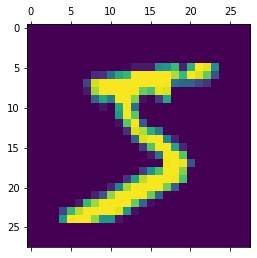

In [6]:
x_train_flat = x_train.reshape(len(x_train),28*28)
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [10]:
x_train_scaled = x_train_flat/255.0
x_test_flat  = x_test.reshape(len(x_test),28*28)
x_test_scaled = x_test_flat/255.0


In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4757 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3046 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9252


In [18]:
y_pred = model.predict(x_test_scaled)

313/313 [==============================] - 0s 1ms/step


In [20]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

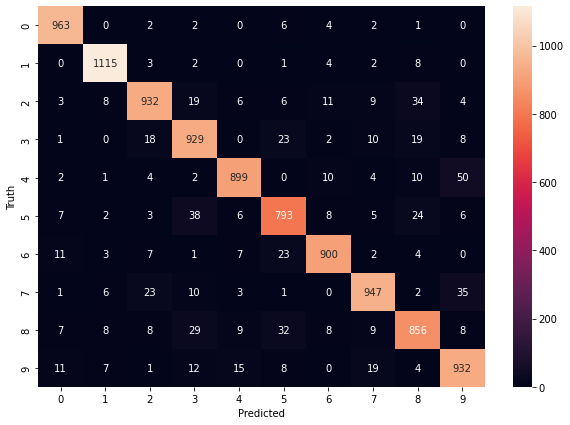

In [22]:
# confusion matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')